# 01.3 - Manipulação de dados
## Analisando dados da saúde com Python e Pandas

Dataset: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Valor total
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)

In [1]:
#importando biblioteca pandas
import pandas as pd

In [2]:
#lendo o arquivo csv com algumas especificações de enconding, padrão do separador ";",
#e identificador de milhares e decimal
#também foi usado os parametros skip pra pular as 3 primeiras e 12 ultimas linhas q não fazem parte dos dados em si!
dados = pd.read_csv("../datasets/A202613189_28_143_208.csv", encoding="ISO-8859-1",
                   skiprows = 3, sep=";", skipfooter=12,
                   thousands=".", decimal=",")
#mostrando apenas os primeiros dados do dataframe
dados.head()

<ipython-input-2-ae9b88539d1d>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv("../datasets/A202613189_28_143_208.csv", encoding="ISO-8859-1",


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [3]:
#formatando as casas decimais
pd.options.display.float_format = "{:.2f}".format

In [4]:
#informações do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


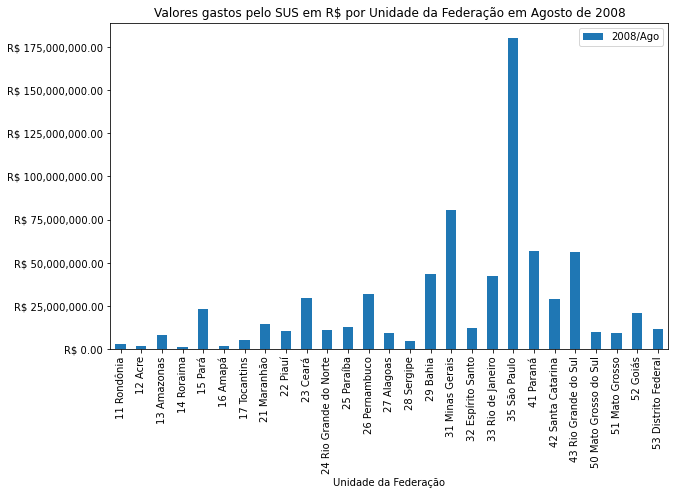

In [5]:
#O pandas não é uma biblioteca gráfica, por conta disso, vamos importar uma biblioteca especifica para plotagem de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()

In [6]:
#Pegamos apenas os anos usaveis
colunas_usaveis = dados.mean().index.tolist()
#adicionamos o indice 0 como "Unidade da Federação"
colunas_usaveis.insert(0, "Unidade da Federação")

In [7]:
dados[colunas_usaveis].head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [8]:
#criamos um dataframe "usaveis"
usaveis = dados[colunas_usaveis]

In [9]:
#Setamos o index "Unidade da Federação"
usaveis = usaveis.set_index("Unidade da Federação")

In [10]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [11]:
#localizamos todas as linhas com o valor em questão
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

In [12]:
#Conseguimos rotacionar (usar a matrix transporta) um dataframe usando o .T
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [13]:
usaveis = usaveis.drop("Total", axis=1)

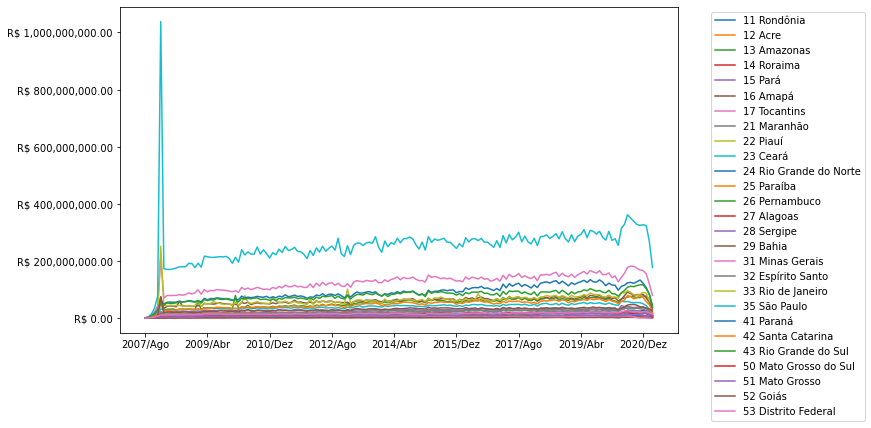

In [14]:
ax = usaveis.T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
#Justando a legenda para o lado
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

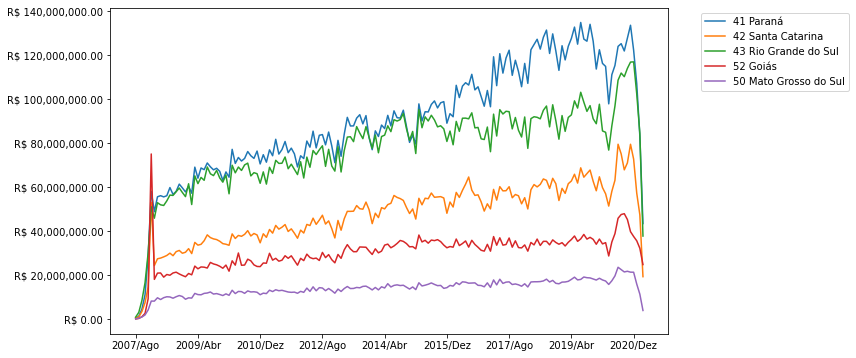

In [15]:
#usei o .loc para mostrar 5 estados especificos
ax = usaveis.loc[["41 Paraná", "42 Santa Catarina", "43 Rio Grande do Sul", "52 Goiás", "50 Mato Grosso do Sul"]].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

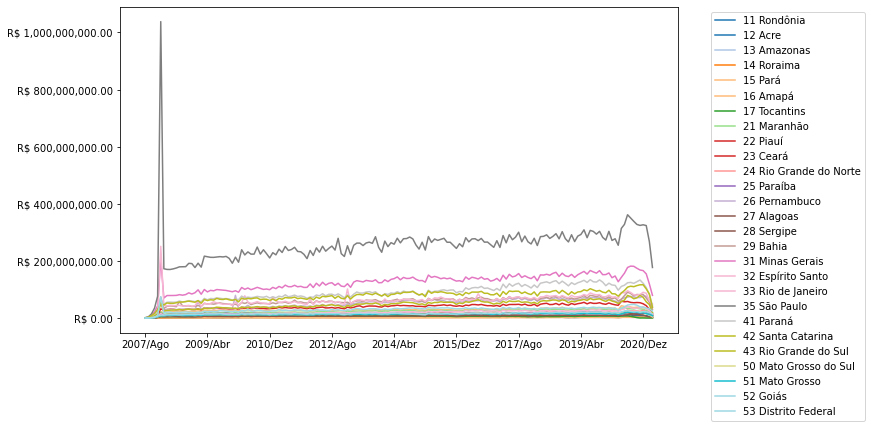

In [16]:
#usando o parametro cmap=plt.get_cmap('tab20') para mudar de palete
ax = usaveis.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab20'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
#Justando a legenda para o lado
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

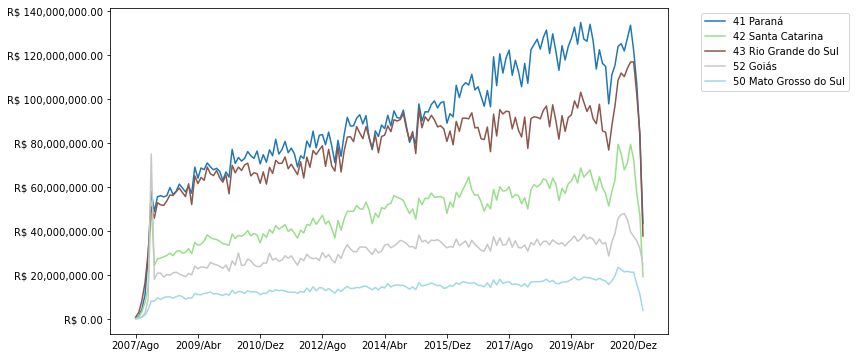

In [17]:
#usando o parametro cmap=plt.get_cmap('tab20') para mudar de palete
ax = usaveis.loc[["41 Paraná", 
                  "42 Santa Catarina", 
                  "43 Rio Grande do Sul", 
                  "52 Goiás", 
                  "50 Mato Grosso do Sul"]].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab20'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [18]:
#Usando valores pseudo-aleatórios com uma seed predefinida
import numpy as np
np.random.seed(687942)

usaveis.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43


In [19]:
usaveis["Total"] = usaveis.sum(axis=1)

In [20]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876551.40
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705290466.69


In [21]:
#Ordenando pelos estados do que mais gastou para o que menos gastou
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48


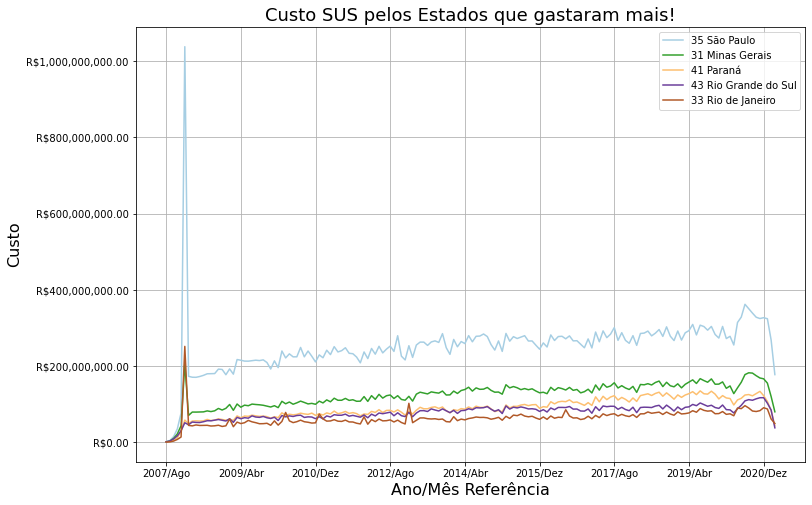

In [22]:
ax = ordenado_por_total.head(5).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [23]:
estados = ordenado_por_total.head(5).index.to_list()
estados

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro']

In [24]:
estados.append("42 Santa Catarina")
estados

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '42 Santa Catarina']

In [25]:
type(estados)

list

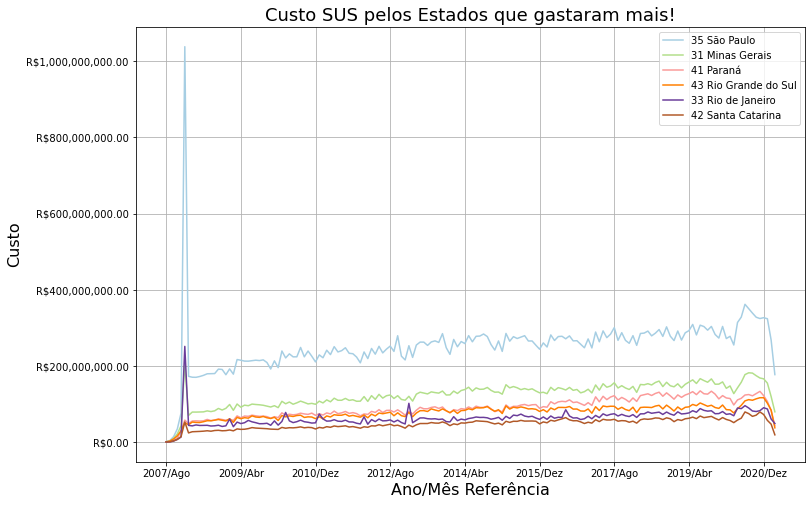

In [26]:
#dei um .loc usando a lista de estados
ax = ordenado_por_total.loc[estados].T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [27]:
#pegando apenas os dados após esse outlier de 2008/Jan
colunas_interessadas = ordenado_por_total.columns[6:]
colunas_interessadas

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov',
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar'],
      dtype='object', length=158)

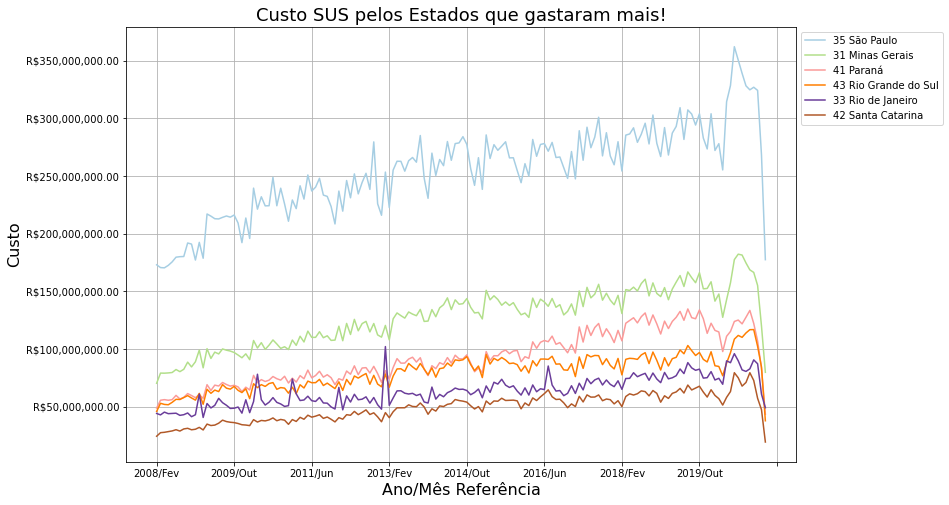

In [28]:
ax = ordenado_por_total[colunas_interessadas].loc[estados].T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [31]:
#adicionando regiões!
col_regiao=[]
regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for row in ordenado_por_total.iterrows():
    
    estado=row[0]
    num_reg = int(estado.split(' ')[0])
    new_estado = estado.split(' ', maxsplit =1)[1]
    filtrados = ordenado_por_total.rename(index={estado:new_estado})
    
    if num_reg < 20:
        col_regiao.append(regioes[0])
    elif num_reg < 30:
        col_regiao.append(regioes[1])
    elif num_reg < 40:
        col_regiao.append(regioes[2])
    elif num_reg < 50:
        col_regiao.append(regioes[3])
    else:
        col_regiao.append(regioes[4])

In [34]:
ordenado_por_total["Região"] = col_regiao
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,Sul
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,Sudeste


In [77]:
ordenado_por_total["Região"] == "Sudeste"

Unidade da Federação
35 São Paulo               True
31 Minas Gerais            True
41 Paraná                 False
43 Rio Grande do Sul      False
33 Rio de Janeiro          True
29 Bahia                  False
26 Pernambuco             False
42 Santa Catarina         False
23 Ceará                  False
52 Goiás                  False
15 Pará                   False
21 Maranhão               False
32 Espírito Santo          True
24 Rio Grande do Norte    False
25 Paraíba                False
53 Distrito Federal       False
50 Mato Grosso do Sul     False
22 Piauí                  False
27 Alagoas                False
51 Mato Grosso            False
13 Amazonas               False
28 Sergipe                False
17 Tocantins              False
11 Rondônia               False
12 Acre                   False
14 Roraima                False
16 Amapá                  False
Name: Região, dtype: bool

In [95]:
estados_sudeste = ordenado_por_total["Região"] == "Sudeste"
#adicionando paraná no sudeste :D
estados_sudeste["41 Paraná"] = True

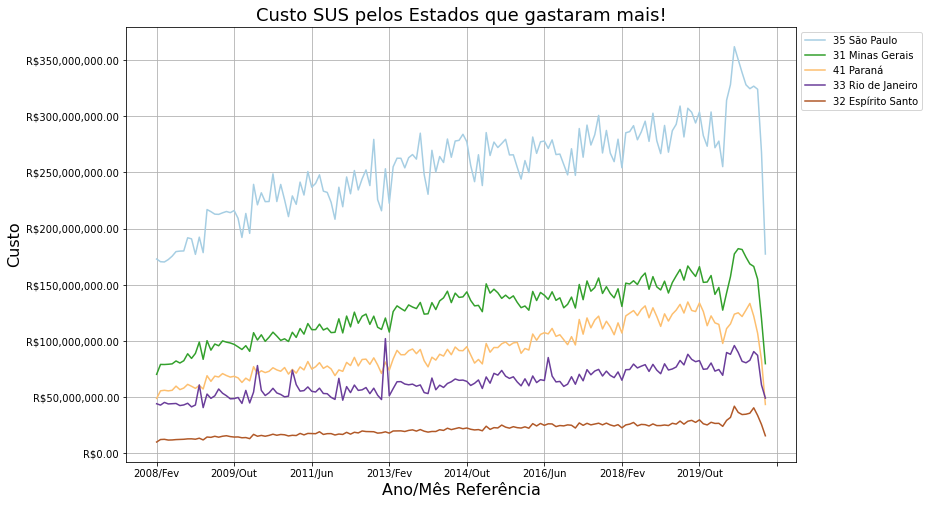

In [96]:
#Mostrando apenas os estados do sudeste
ax = ordenado_por_total[colunas_interessadas].loc[estados_sudeste].T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)